In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [6]:
path = Path.cwd(); path.ls()

[PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/2017 Arabic Handwritten Characters Recognition using Convolutional Neural Network.pdf'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/Test Images 3360x32x32.zip'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/Arabic Handwritten Characters Dataset CSV.zip'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/README.md'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/.git'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/Train+Test Images Matlab.mat'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/Train Images 13440x32x32.zip'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/.ipynb_checkpoints'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/Arabic Handwritten Characters Dataset.ipynb')]

In [10]:
! unzip -q -n {(path / "Train\ Images\ 13440x32x32.zip")} -d {path}

In [11]:
! unzip -q -n {(path / "Test\ Images\ 3360x32x32.zip")} -d {path}

In [15]:
! mv {path / 'test'} {path / 'valid'}

In [16]:
path.ls()

[PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/2017 Arabic Handwritten Characters Recognition using Convolutional Neural Network.pdf'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/Test Images 3360x32x32.zip'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/Arabic Handwritten Characters Dataset CSV.zip'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/README.md'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/valid'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/.git'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/Train+Test Images Matlab.mat'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/Train Images 13440x32x32.zip'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/train'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/.ipynb_checkpoints'),
 PosixPath('/home/jupyter/Arabic-Handwritten-Characters-Dataset/Ara

In [17]:
class_labels = [
    'alef',
    'beh',
    'teh',
    'theh',
    'jeem',
    'hah',
    'khah',
    'dal',
    'thal',
    'reh',
    'zain',
    'seen',
    'sheen',
    'sad',
    'dad',
    'tah',
    'zah',
    'ain',
    'ghain',
    'feh',
    'qaf',
    'kaf',
    'lam',
    'meem',
    'noon',
    'heh',
    'waw',
    'yeh']

In [36]:
import re
def get_label(file_path):
    regex = r'/id_\d+_label_(\d+)\.png$'
    label = re.search(regex, str(file_path)).group(1)
    return class_labels[int(label)-1]

In [107]:
data = (ImageFileList.from_folder(path)
        .label_from_func(get_label)
        .split_by_folder()
        .datasets()
        .transform(get_transforms(do_flip=False, max_lighting=0.5, p_lighting=0.9), size=224)
        .databunch()
        .normalize(imagenet_stats))

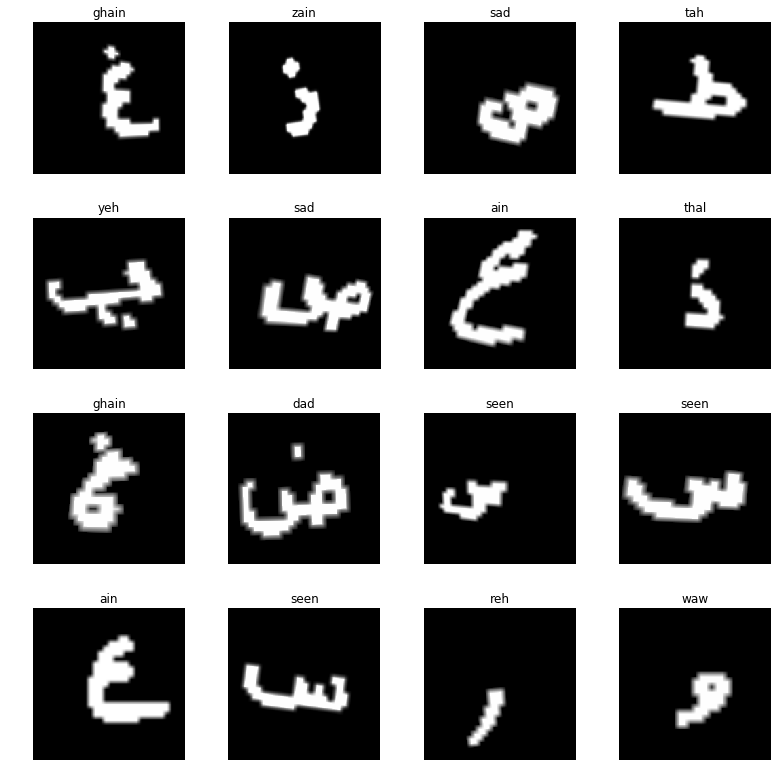

In [108]:
data.show_batch(rows=4, figsize=(11, 11))

In [109]:
assert len(data.train_ds) == 13440
assert len(data.valid_ds) == 3360

In [110]:
print(data.classes)
len(data.classes), data.c

['feh', 'waw', 'zain', 'alef', 'sad', 'yeh', 'teh', 'dad', 'noon', 'khah', 'theh', 'heh', 'qaf', 'lam', 'tah', 'thal', 'beh', 'seen', 'ain', 'sheen', 'zah', 'reh', 'meem', 'dal', 'jeem', 'kaf', 'hah', 'ghain']


(28, 28)

## Training

In [111]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [112]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


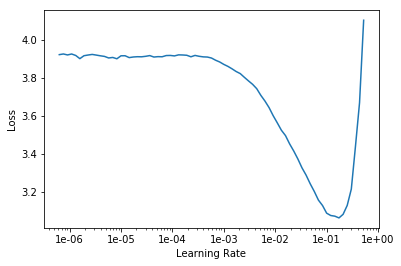

In [113]:
learn.recorder.plot()

In [114]:
lr = 1e-2

In [115]:
learn.fit_one_cycle(10, slice(lr))

Total time: 06:58
epoch  train_loss  valid_loss  accuracy
1      1.140913    0.529026    0.830060  (00:41)
2      0.619409    0.340606    0.889881  (00:41)
3      0.510117    0.360446    0.891964  (00:41)
4      0.395170    0.257466    0.920238  (00:42)
5      0.323331    0.220126    0.936012  (00:41)
6      0.291294    0.182169    0.944345  (00:41)
7      0.229403    0.142236    0.954762  (00:41)
8      0.177061    0.127481    0.960417  (00:42)
9      0.147932    0.120442    0.963988  (00:42)
10     0.147816    0.117739    0.961905  (00:41)



In [116]:
learn.save('stage-1')

## Unfreezing, fine-tuning, and learning rates

In [117]:
learn.unfreeze()

In [118]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


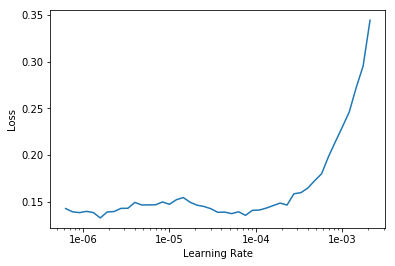

In [119]:
learn.recorder.plot()

In [120]:
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4))

Total time: 09:08
epoch  train_loss  valid_loss  accuracy
1      0.131887    0.117858    0.962500  (00:53)
2      0.130411    0.116693    0.963988  (00:54)
3      0.144814    0.114758    0.964286  (00:54)
4      0.127013    0.110403    0.966369  (00:54)
5      0.118395    0.107215    0.967262  (00:54)
6      0.108792    0.109384    0.965179  (00:54)
7      0.102684    0.106683    0.967560  (00:55)
8      0.095247    0.103948    0.967857  (00:55)
9      0.098254    0.103818    0.967857  (00:55)
10     0.102364    0.104195    0.968750  (00:55)



In [121]:
learn.save('stage-2')

## Interpretation

In [122]:
interp = ClassificationInterpretation.from_learner(learn)

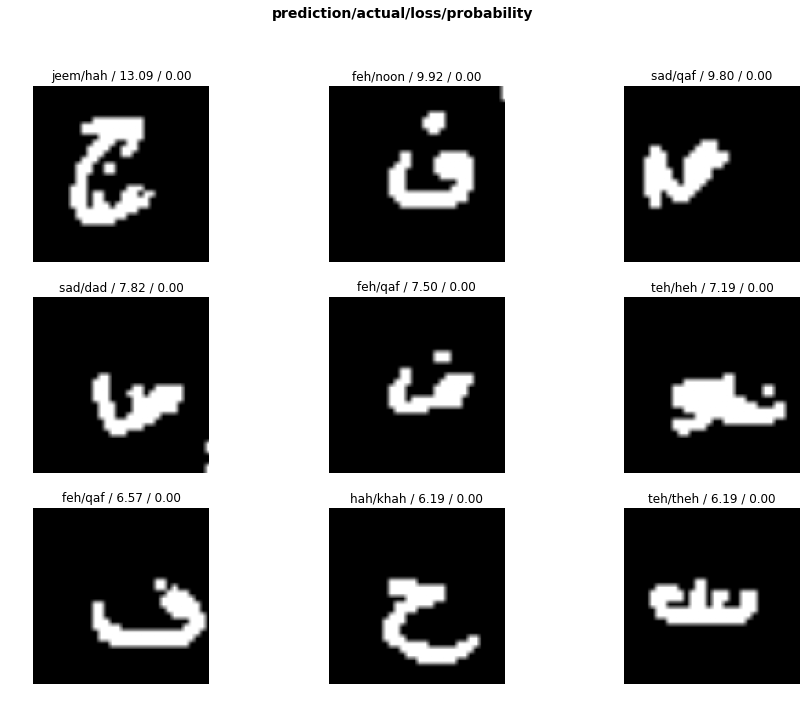

In [123]:
interp.plot_top_losses(9, figsize=(15,11))

In [124]:
interp.most_confused(min_val=2)

[('zain', 'reh', 9),
 ('noon', 'teh', 6),
 ('dad', 'sad', 5),
 ('thal', 'zain', 5),
 ('feh', 'qaf', 4),
 ('zain', 'thal', 4),
 ('theh', 'teh', 4),
 ('heh', 'waw', 4),
 ('qaf', 'feh', 4),
 ('zah', 'tah', 4),
 ('thal', 'dal', 3),
 ('seen', 'sad', 3),
 ('ain', 'hah', 3)]

In [ ]:
interp